# Import and importance variable

In [6]:
import pandas as pd
import psycopg2
import time
import numpy as np
import re
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [7]:
COMPUTER_NAME = ['panda','thylacine','komodo','gila']
DATA_DIR = 'C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/'
SAVE_DIR = 'C:/Users/brook/Quang_workstation/Shooting_game/Output/Output_1/'

if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

In [8]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Load data

In [9]:
# Initialize an empty list to store DataFrames
df_list = []

# Iterate over each file in the directory
for filename in os.listdir(DATA_DIR):
    if filename.endswith('.plk'):
        file_path = os.path.join(DATA_DIR, filename)
        print(file_path)
        
        temp_df = pd.read_pickle(file_path)
        df_list.append(temp_df)

data_df = pd.concat(df_list, ignore_index=True)
data_df

C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2023_11_29.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2023_12_5.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2024_1_31.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2024_2_21.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2024_2_29.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2024_3_13.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2024_3_5.plk
C:/Users/brook/Quang_workstation/Shooting_game/Extract_data/shooting_game_data_2024_3_6.plk


,Subject_id,Computer_name,Block_type,Date,Session_id,Match_start,Match_end,Total_damage_deal,Gun_damage_deal,Rocket_damage_deal,Total_damage_taken,Gun_damage_taken,Rocket_damage_taken,Total_engage,Gun_engage,Rocket_engage,Total_shot_all,Gun_shot_all,Rocket_shot_all,Total_shot_hit,Gun_shot_hit,Rocket_shot_hit,Damager_per_Second_all,Shot_per_Second_all,Damager_per_Second_Hit_only,Shot_per_Second_Hit_only
0,SBQRG,reptile_komodo,baseline,2023-11-29,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SBQRG,reptile_komodo,block_01,2023-11-29,b8944796-41be-f0ad-8f57-35adbb4944c5,2023-11-29 12:52:05.310171-05:00,2023-11-29 13:02:20.369341-05:00,779.798372,660.0,119.798372,542.810332,360.0,182.810332,16.0,16.0,0.0,146.0,143.0,3.0,46.0,44.0,2.0,3.721734,0.237376,1.267843,0.074790
2,SBQRG,reptile_komodo,block_02,2023-11-29,cd9f5b3e-459d-c4b2-e21f-3f9e38f88056,2023-11-29 13:16:55.523427-05:00,2023-11-29 13:27:11.089638-05:00,963.656349,510.0,453.656349,667.366717,525.0,142.366717,23.0,16.0,7.0,127.0,116.0,11.0,41.0,34.0,7.0,3.762105,0.206314,1.565480,0.066605
3,SBQRG,reptile_komodo,block_03,2023-11-29,9dad9043-4b16-3913-ef6c-b4b80700c54d,2023-11-29 13:32:35.035246-05:00,2023-11-29 13:42:51.126542-05:00,655.195369,555.0,100.195369,692.752768,360.0,332.752768,22.0,15.0,7.0,126.0,117.0,9.0,39.0,37.0,2.0,3.400765,0.204515,1.063471,0.063302
4,SBTBT,mammal_thylacine,baseline,2023-11-29,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,VBNM,reptile_komodo,baseline,2024-03-06,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,VBNM,reptile_komodo,block_01,2024-03-06,85a5023a-4976-0721-23b2-028c85a483dd,2024-03-06 13:26:26.617466-05:00,2024-03-06 13:36:42.000566-05:00,645.424416,555.0,90.424416,305.181516,195.0,110.181516,22.0,20.0,2.0,124.0,121.0,3.0,38.0,37.0,1.0,3.398532,0.201500,1.048817,0.061750
149,VBNM,reptile_komodo,block_02,2024-03-06,32143347-4542-7282-6c5b-b7b56e6a33c5,2024-03-06 13:42:57.110688-05:00,2024-03-06 13:53:13.359943-05:00,1010.431666,510.0,500.431666,368.848155,120.0,248.848155,28.0,18.0,10.0,152.0,136.0,16.0,44.0,34.0,10.0,4.682853,0.246653,1.639648,0.071400
150,VBNM,reptile_komodo,block_03,2024-03-06,dd256e2a-4e9a-fe7f-54b8-66bfb1d5fa7e,2024-03-06 13:57:21.312206-05:00,2024-03-06 14:07:37.711329-05:00,1672.908988,1245.0,427.908988,437.938624,270.0,167.938624,31.0,29.0,2.0,220.0,212.0,8.0,88.0,83.0,5.0,5.912155,0.356912,2.714003,0.142765


In [10]:
ID_LIST = data_df['Subject_id'].unique()
ID_LIST

array(['SBQRG', 'SBTBT', 'SVTZM', 'SXVBN', 'SNMVN', 'SPKZR', 'SRKLP',
       'STWXJ', 'FTLD', 'GTYU', 'HJKL', 'ZYXW', 'LKPW', 'MTYH', 'VNPL',
       'XZPT', 'PKJH', 'QXZW', 'WERT', 'ZXCV', 'LPZV', 'MJUY', 'UYGH',
       'ZRTY', 'DKLQ', 'QAXY', 'RQWE', 'TYDF', 'JHGF', 'LRTB', 'QWRT',
       'VBNM'], dtype=object)

# Ploting all section

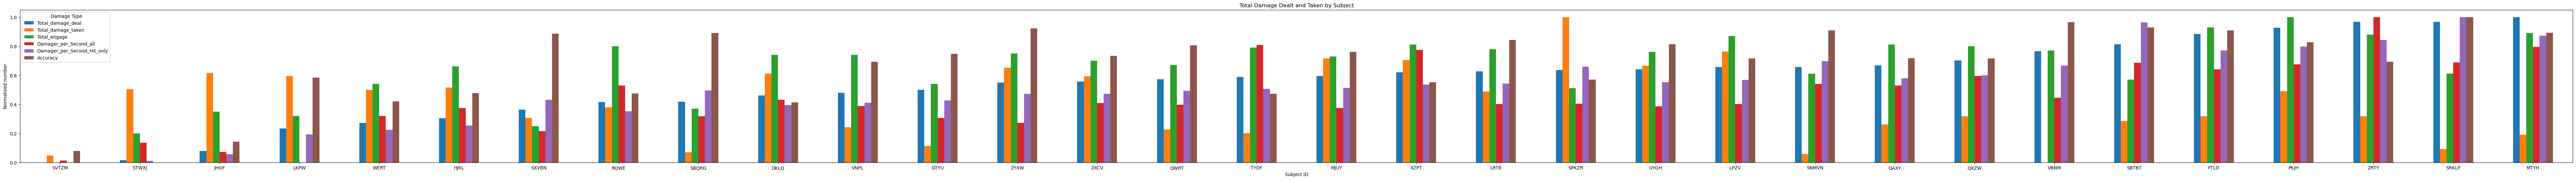

In [14]:
# Group by Subject_id and sum the Total_damage_deal and Total_damage_taken
grouped_df = data_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_damage_taken': 'sum',
     'Total_engage' : 'sum',
     'Damager_per_Second_all': 'mean',
     'Damager_per_Second_Hit_only': 'mean',
     'Total_shot_all': 'sum',
     'Total_shot_hit': 'sum',
     
    })

grouped_df['Accuracy'] = grouped_df['Total_shot_hit'] / grouped_df['Total_shot_all']
grouped_df = grouped_df.drop(columns=['Total_shot_all', 'Total_shot_hit'])
grouped_df = grouped_df.sort_values(by='Total_damage_deal')

normalized_data = MinMaxScaler().fit_transform(grouped_df)
normalized_df = pd.DataFrame(normalized_data, index=grouped_df.index, columns=grouped_df.columns)


# Plotting
normalized_df.plot(kind='bar', figsize=(100, 6))
plt.title('Total Damage Dealt and Taken by Subject')
plt.xlabel('Subject ID')
plt.ylabel('Normalized number')
plt.xticks(rotation=0)
plt.legend(title='Damage Type')
plt.savefig(SAVE_DIR + 'all.png')
plt.show()

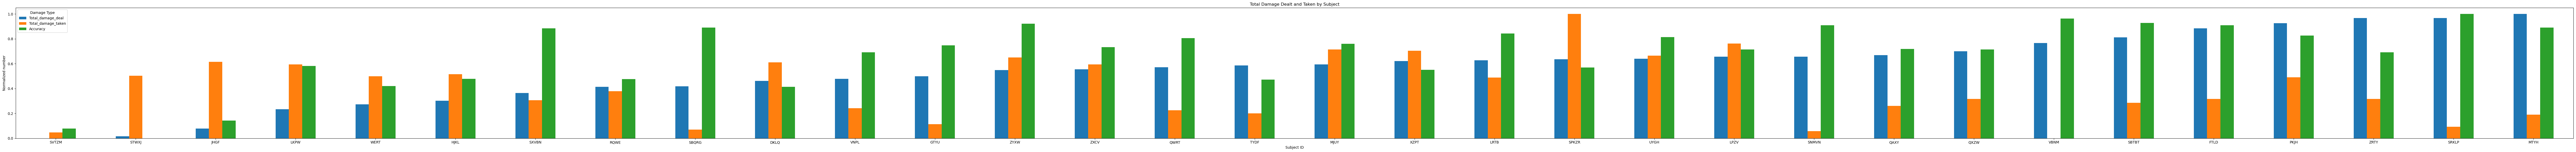

In [20]:
#accurcacy

grouped_df = data_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_damage_taken': 'sum',
     'Total_shot_all': 'sum',
     'Total_shot_hit': 'sum',
     
    })


#grouped_df['Damage_difference'] = grouped_df['Total_damage_deal'] - grouped_df['Total_damage_taken']
#grouped_df = grouped_df.drop(columns=['Total_damage_deal', 'Total_damage_taken'])
#grouped_df = grouped_df.drop(columns=['Total_damage_taken'])

grouped_df['Accuracy'] = grouped_df['Total_shot_hit'] / grouped_df['Total_shot_all']
grouped_df = grouped_df.drop(columns=['Total_shot_all', 'Total_shot_hit'])

grouped_df = grouped_df.sort_values(by='Total_damage_deal')

normalized_data = MinMaxScaler().fit_transform(grouped_df)
normalized_df = pd.DataFrame(normalized_data, index=grouped_df.index, columns=grouped_df.columns)

# Plotting
normalized_df.plot(kind='bar', figsize=(100, 6))
plt.title('Total Damage Dealt and Taken by Subject')
plt.xlabel('Subject ID')
plt.ylabel('Normalized number')
plt.xticks(rotation=0)
plt.legend(title='Damage Type')
plt.tight_layout()
plt.savefig(SAVE_DIR + 'damage_and_accuracy.png')
plt.show()

In [21]:
print(grouped_df['Accuracy'].min())
print(grouped_df['Accuracy'].mean())
print(grouped_df['Accuracy'].max())
grouped_df['Accuracy'].describe()

0.03398058252427184
0.2470376065381385
0.350354609929078


count    32.000000
mean      0.247038
std       0.081436
min       0.033981
25%       0.202662
50%       0.263478
75%       0.314580
max       0.350355
Name: Accuracy, dtype: float64

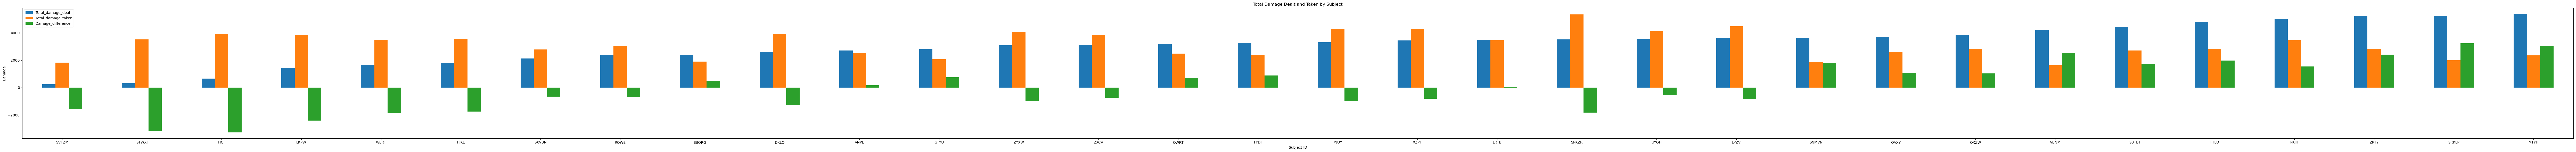

In [16]:
#Damage deal and taken

grouped_df = data_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_damage_taken': 'sum',
     
    })


grouped_df['Damage_difference'] = grouped_df['Total_damage_deal'] - grouped_df['Total_damage_taken']
grouped_df = grouped_df.sort_values(by='Total_damage_deal')


# Plotting
grouped_df.plot(kind='bar', figsize=(100, 6))
plt.title('Total Damage Dealt and Taken by Subject')
plt.xlabel('Subject ID')
plt.ylabel('Damage')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig(SAVE_DIR + 'damage_and_damage_difference.png')
plt.show()

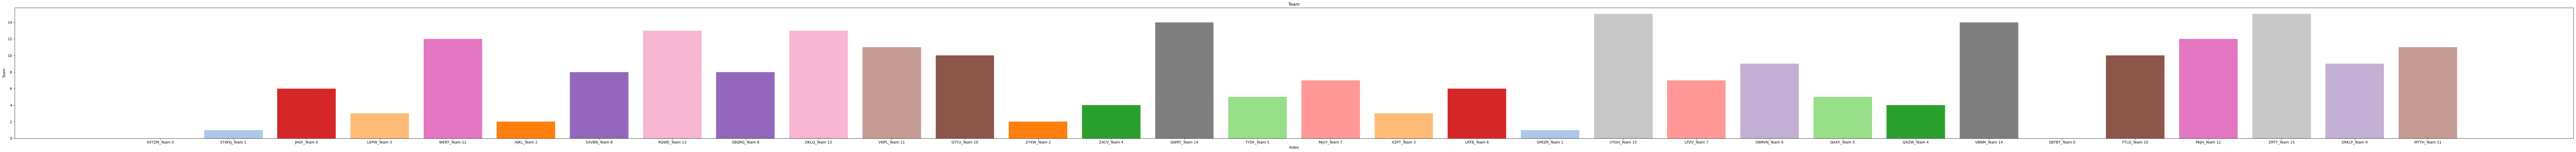

In [73]:
temp_df = data_df.copy()

# Assign the same number to Team column if Computer_name and Date are the same
temp_df.loc[temp_df['Computer_name'].str.contains('mammal'), 'Computer_name'] = 'mammal'
temp_df.loc[temp_df['Computer_name'].str.contains('reptile'), 'Computer_name'] = 'reptile'

temp_df['Team'] = temp_df.groupby(['Computer_name', 'Date']).ngroup()
grouped_df = temp_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_damage_taken': 'sum',
     'Team' : 'first',
    })
grouped_df = grouped_df.sort_values(by='Total_damage_deal')

# Plot bar chart
plt.figure(figsize=(100, 6))

# Assign colors based on Team
bar_colors = plt.get_cmap('tab20')(grouped_df['Team'])
bar_plot_deal = plt.bar(grouped_df.index, grouped_df['Team'], color=bar_colors, label='Total Damage Deal')


# Add labels and title
plt.xlabel('Index')
plt.ylabel('Team')
plt.title('Team')
plt.xticks(grouped_df.index, grouped_df.index + '_' + [f'Team {i}' for i in grouped_df['Team']])
plt.tight_layout()
plt.savefig(SAVE_DIR + 'team.png')
plt.show()

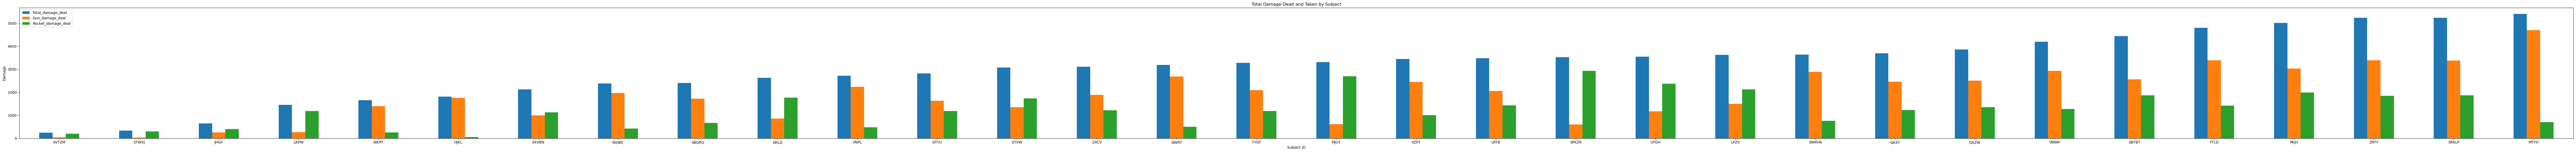

In [18]:
#Damage deal and taken

grouped_df = data_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_damage_taken': 'sum',
     'Gun_damage_deal': 'sum',
     'Rocket_damage_deal' : 'sum',
    })


#grouped_df['Damage_difference'] = grouped_df['Total_damage_deal'] - grouped_df['Total_damage_taken']
grouped_df = grouped_df.drop(columns=['Total_damage_taken'])
grouped_df = grouped_df.sort_values(by='Total_damage_deal')


# Plotting
grouped_df.plot(kind='bar', figsize=(100, 6))
plt.title('Total Damage Dealt and Taken by Subject')
plt.xlabel('Subject ID')
plt.ylabel('Damage')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig(SAVE_DIR + 'damage_and_gun_versus_rocket.png')
plt.show()

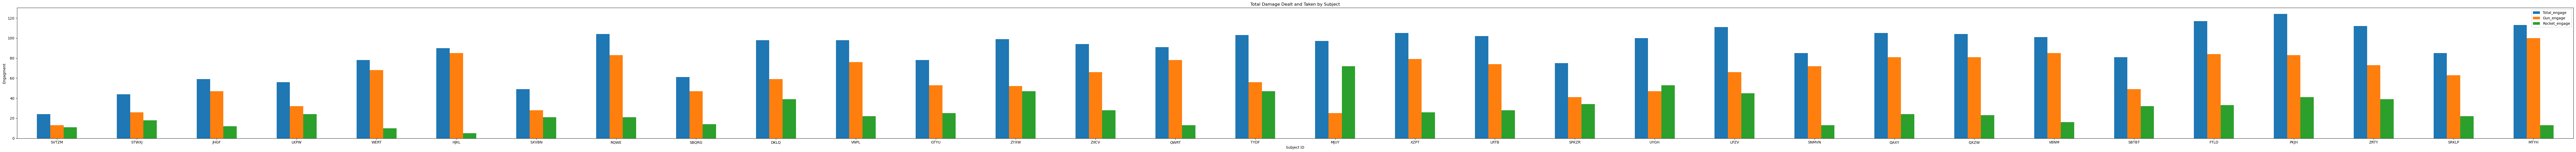

In [19]:
#Damage deal and taken

grouped_df = data_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_engage': 'sum',
     'Gun_engage': 'sum',
     'Rocket_engage' : 'sum',
    })


grouped_df = grouped_df.sort_values(by='Total_damage_deal')
grouped_df = grouped_df.drop(columns=['Total_damage_deal'])



# Plotting
grouped_df.plot(kind='bar', figsize=(100, 6))
plt.title('Total Damage Dealt and Taken by Subject')
plt.xlabel('Subject ID')
plt.ylabel('Engagment')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig(SAVE_DIR + 'engage_and_gun_versus_rocket.png')
plt.show()

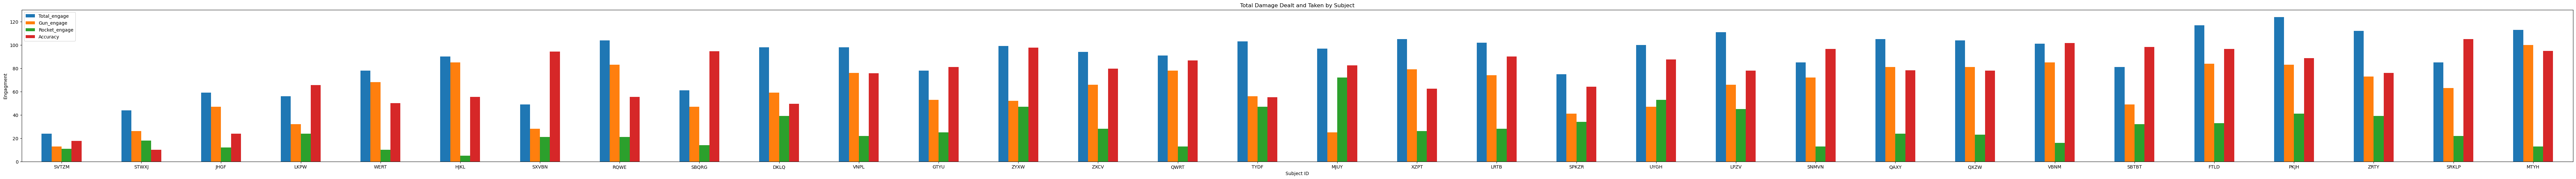

In [83]:
#Damage deal and taken

grouped_df = data_df.groupby('Subject_id').agg(
    {'Total_damage_deal': 'sum',
     'Total_engage': 'sum',
     'Gun_engage': 'sum',
     'Rocket_engage' : 'sum',
     'Total_shot_all': 'sum',
     'Total_shot_hit': 'sum',
    })


grouped_df = grouped_df.sort_values(by='Total_damage_deal')
grouped_df = grouped_df.drop(columns=['Total_damage_deal'])

grouped_df['Accuracy'] = grouped_df['Total_shot_hit'] / grouped_df['Total_shot_all'] * 100 * 3
grouped_df = grouped_df.drop(columns=['Total_shot_all', 'Total_shot_hit'])




# Plotting
grouped_df.plot(kind='bar', figsize=(100, 6))
plt.title('Total Damage Dealt and Taken by Subject')
plt.xlabel('Subject ID')
plt.ylabel('Engagment')
plt.xticks(rotation=0)
plt.legend()
plt.show()